# <b> Seoul Bike Sharing Demand Prediction </b>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# To setup the display for column limit to max
pd.set_option("display.max_columns", None)

In [2]:
# Importing the dataset
bike_df = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

## Data Understanding

In [3]:
# To know the total count of rows and columns in the dataset.
bike_df.shape

(8760, 14)

In [4]:
# To print first Five rows
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# To ptint last five rows
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Check the information of dataset to know the data types of columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# To check the count of nulls in dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
# To know the statistical information about dataset for each column
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Data Preparation

In [9]:
# To print column title
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Changing The datatype of Date columns from string to date type
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d-%m-%Y')

In [11]:
# Now create new columns for Month, Year, and Day
bike_df['Month'] = bike_df['Date'].dt.month

bike_df['Day'] = bike_df['Date'].dt.day_name()    

In [12]:
# Create new column to checking weekends or weekdays. Assigning weekdays as 0 and weekends as 1
bike_df['Weekdays_or_weekend'] = bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [13]:
# Drop Day and Date columns
bike_df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [14]:
# To verify new columns
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [15]:
# To get distinct counts for the Seasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
# To get distinct counts for the Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [17]:
# To get distinct counts for Functioning_Day categories
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [18]:
# To get distinct counts for the Month categories
bike_df['Month'].value_counts()

12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [19]:
# To get distinct counts for the Weekdays_or_weekend categories
bike_df['Weekdays_or_weekend'].value_counts()

0    6264
1    2496
Name: Weekdays_or_weekend, dtype: int64

In [20]:
# To Check the statistical summary for dataset
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.284932
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.451408
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [21]:
# To check Duplicate rows in dataset.
duplicates = bike_df.duplicated().sum()
print(f"The total {duplicates} duplicate records in Data.")

The total 0 duplicate records in Data.


## Exploratory Data Analysis

In [22]:
# To create numerical data list.
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')

In [23]:
# To create categorical data list
categorical_columns = list(set(bike_df.columns) - set(numeric_features))
categorical_columns

['Functioning Day', 'Seasons', 'Holiday']

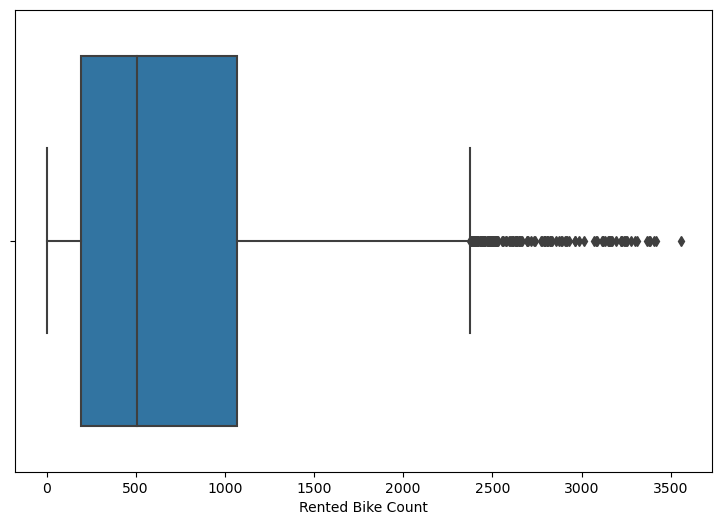

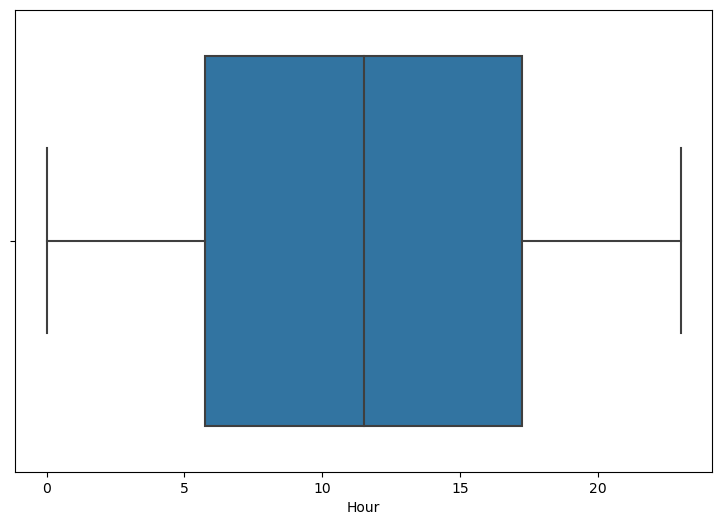

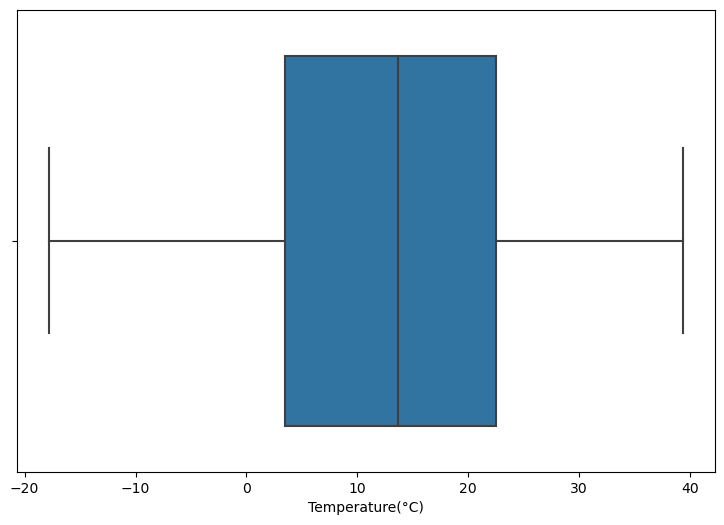

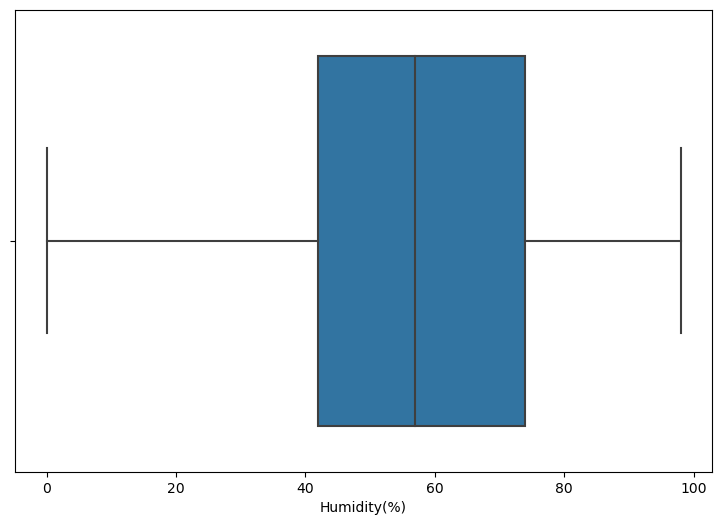

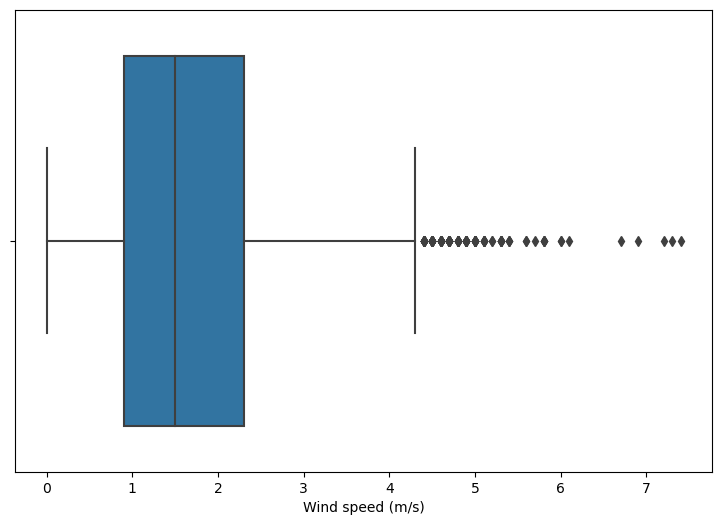

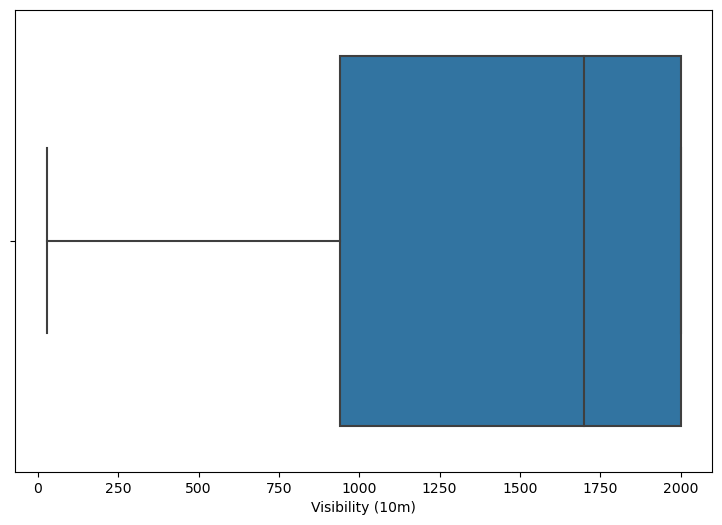

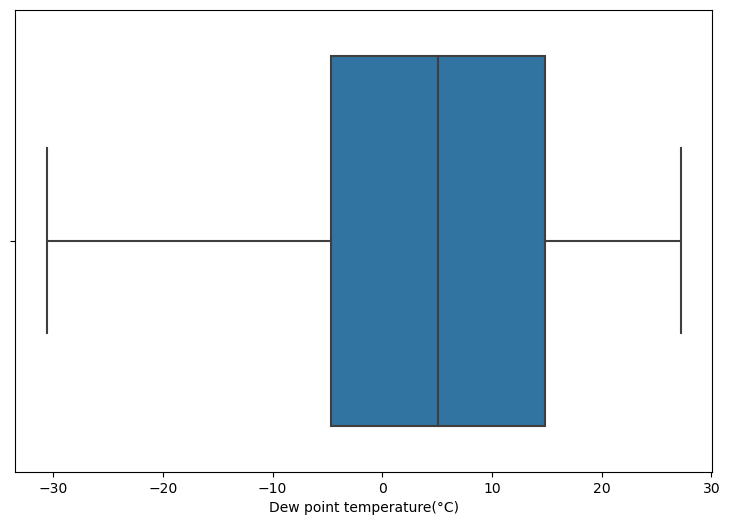

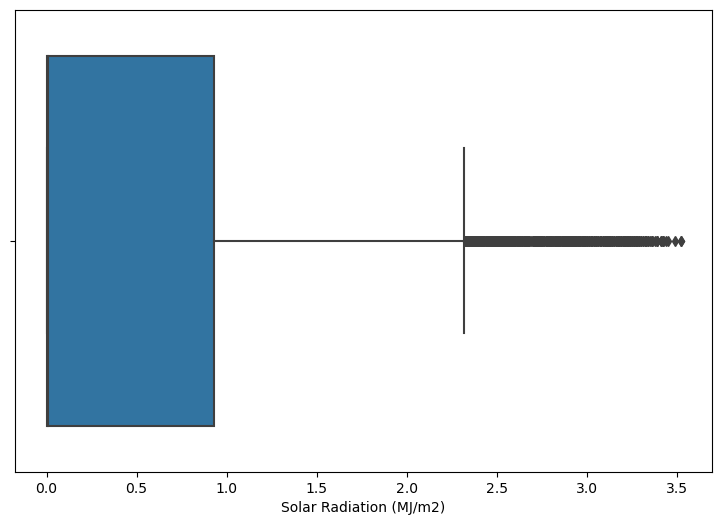

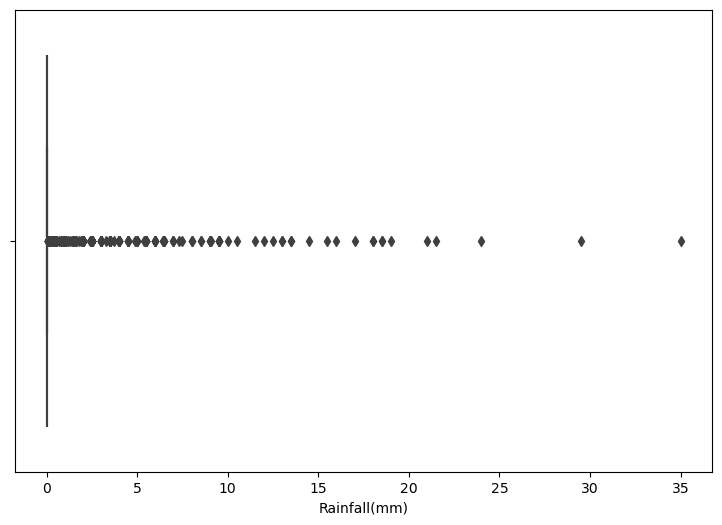

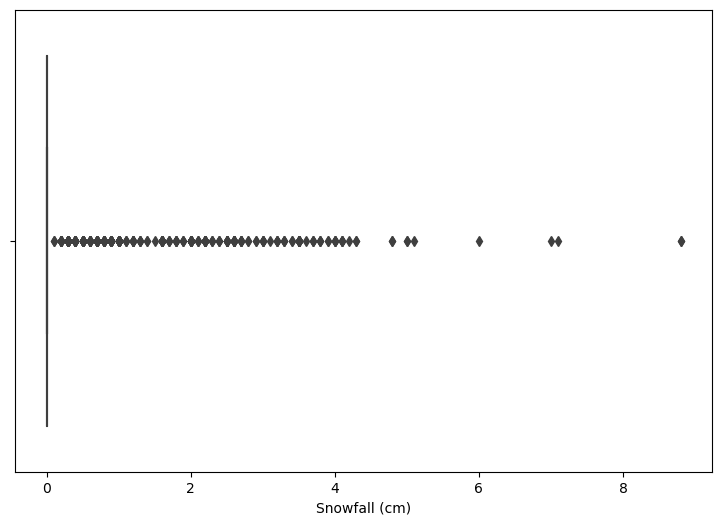

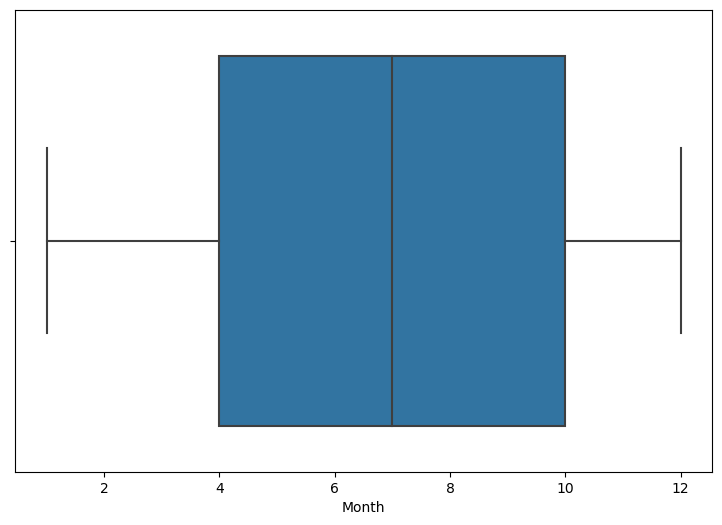

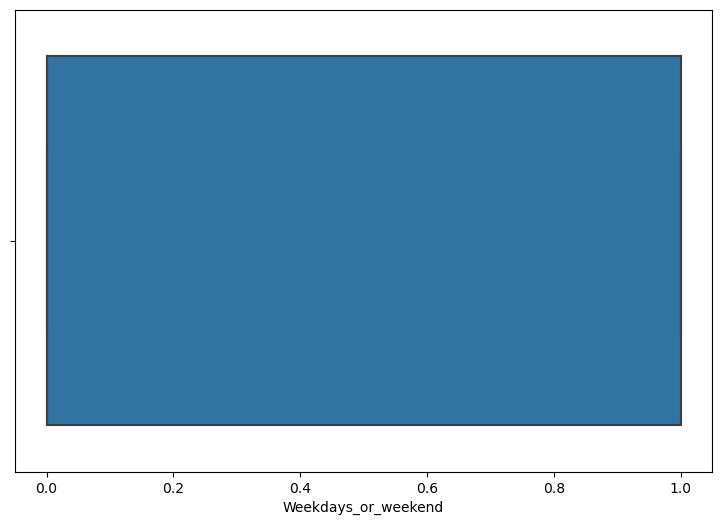

In [24]:
# plot box plot for numerical data to check oultliers
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = bike_df[col])

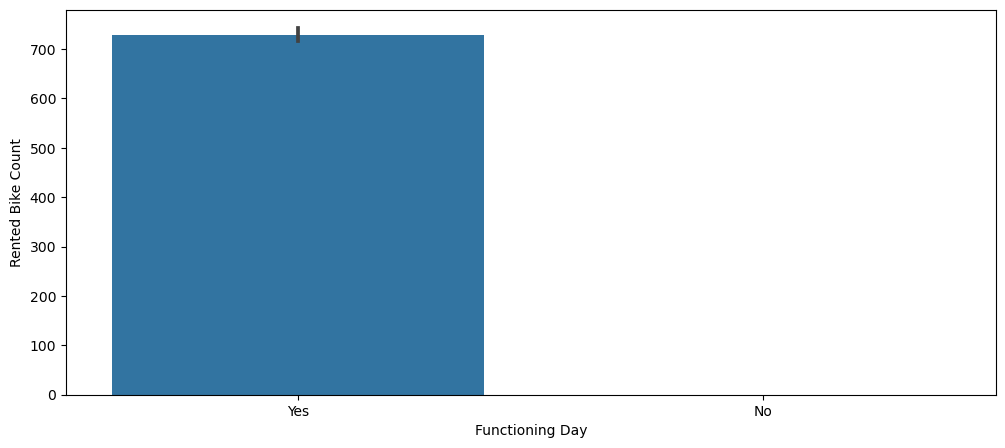

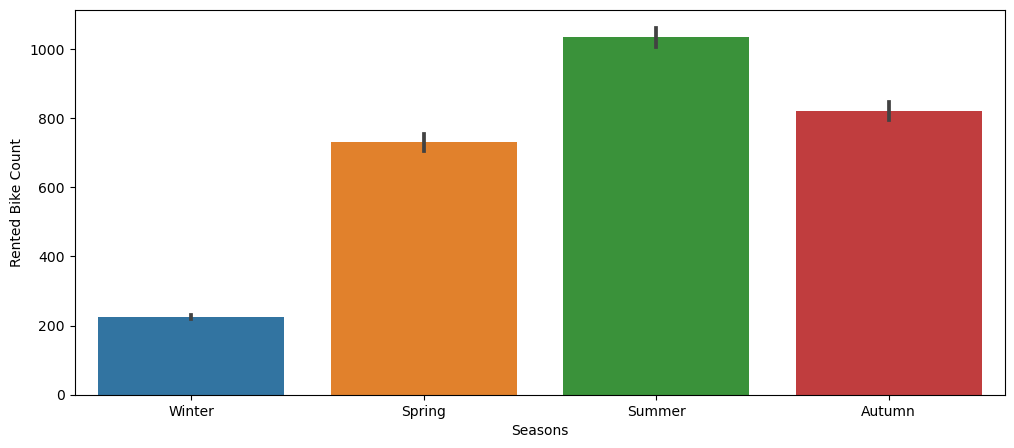

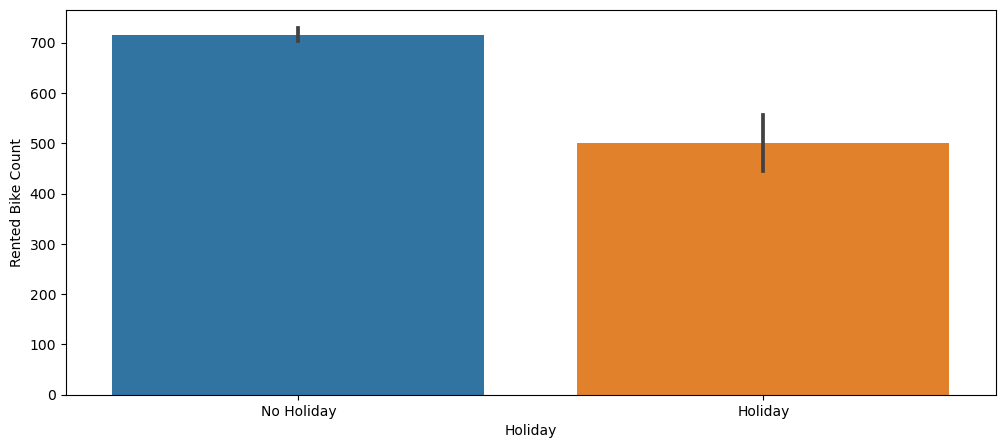

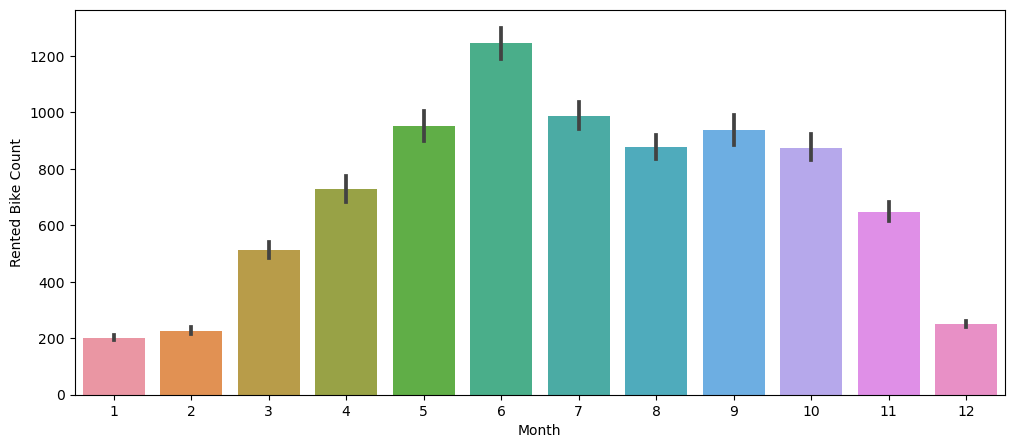

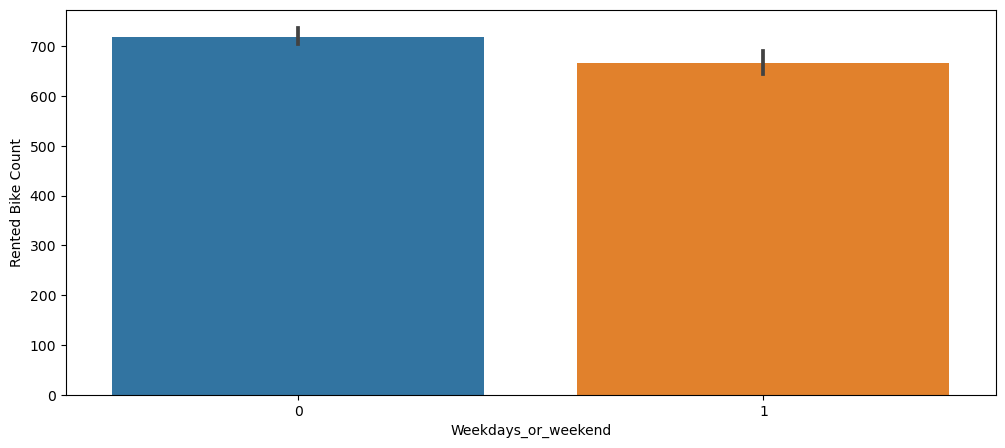

In [25]:
# To Add two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart for each categorical data with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = bike_df[col],y = bike_df['Rented Bike Count'])

## Target variable (Bike Rent Count) Vs Categorical Columns

Text(0.5, 1.0, 'Bike rent hourly on Holiday / No Holiday')

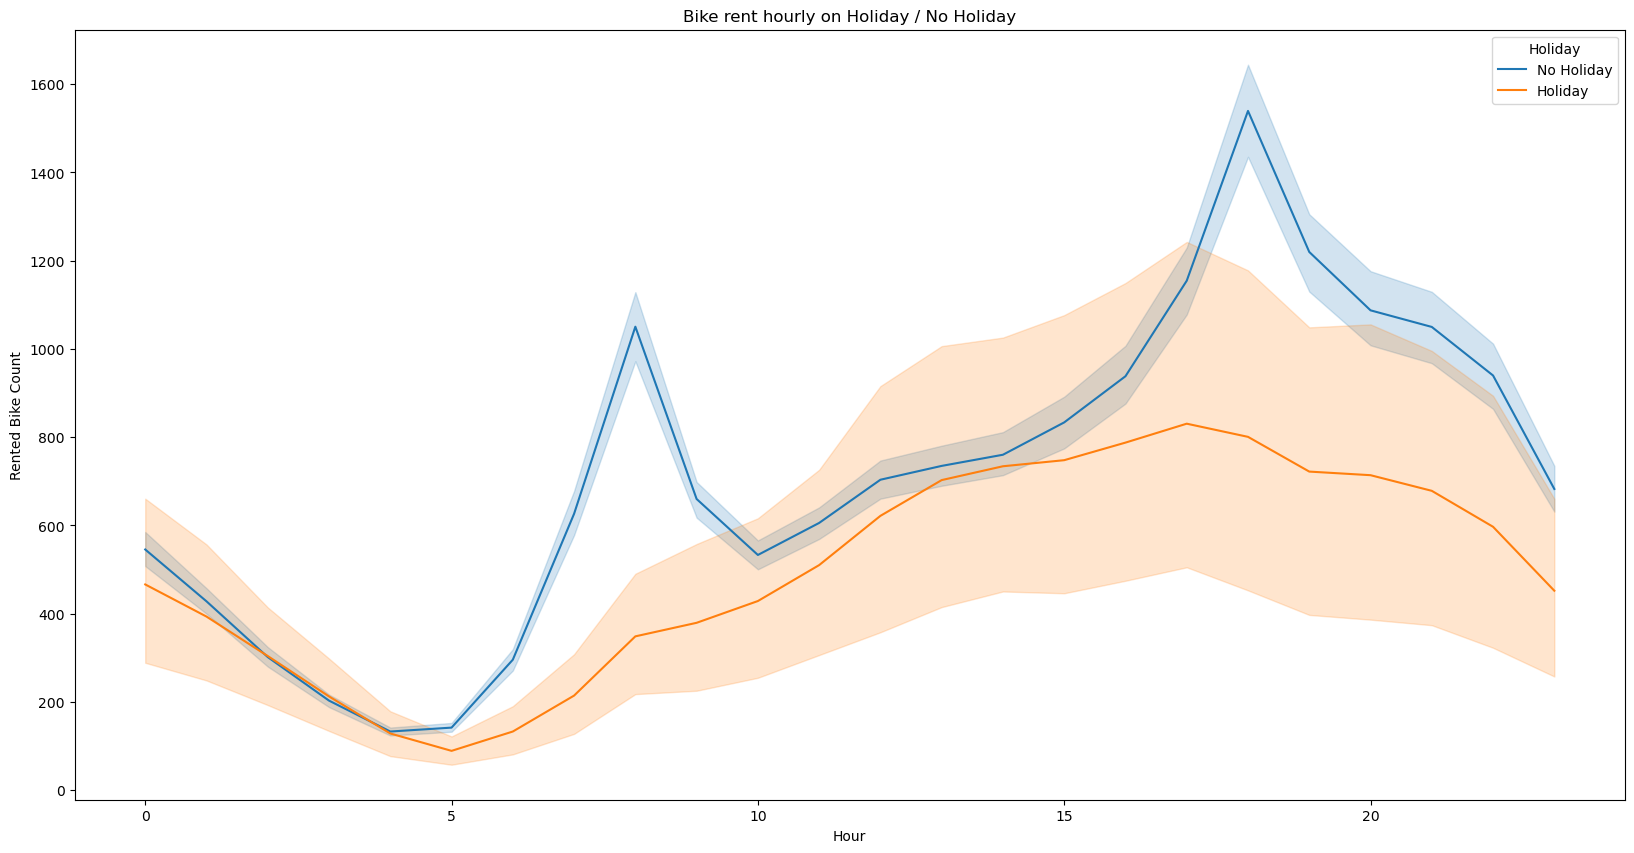

In [26]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.lineplot(x = bike_df['Hour'],y = bike_df['Rented Bike Count'],hue = bike_df['Holiday'])
plt.title("Bike rent hourly on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Hourly Rental Trend on Holiday / No Holiday')

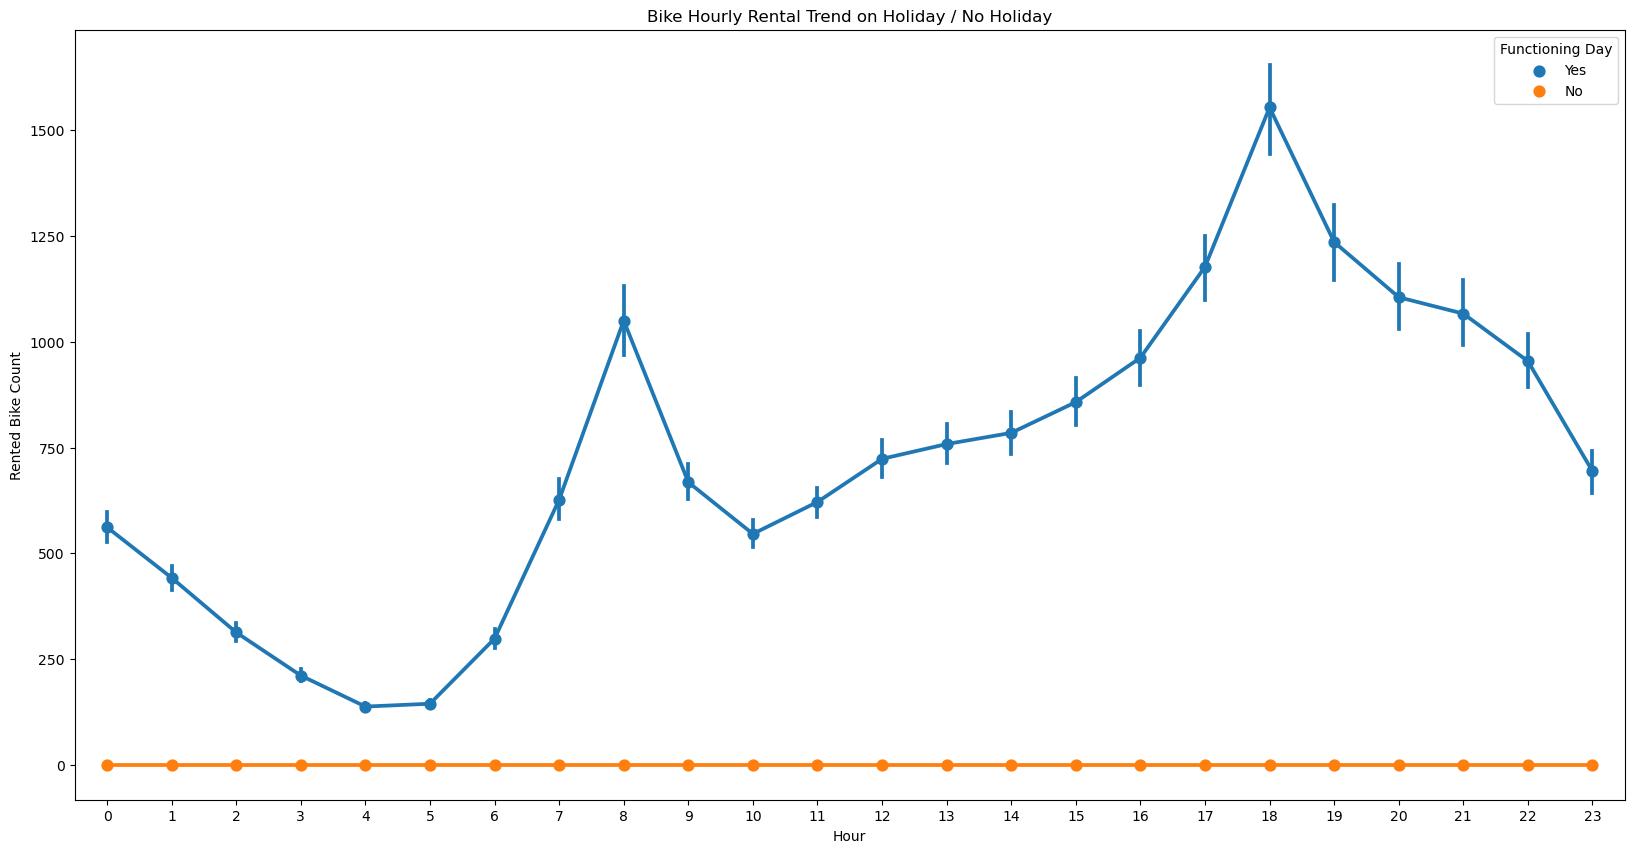

In [27]:
# Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x = bike_df['Hour'],y = bike_df['Rented Bike Count'],hue = bike_df['Functioning Day'])
plt.title("Bike Hourly Rental Trend on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Hourly Rental Trend on Holiday / No Holiday')

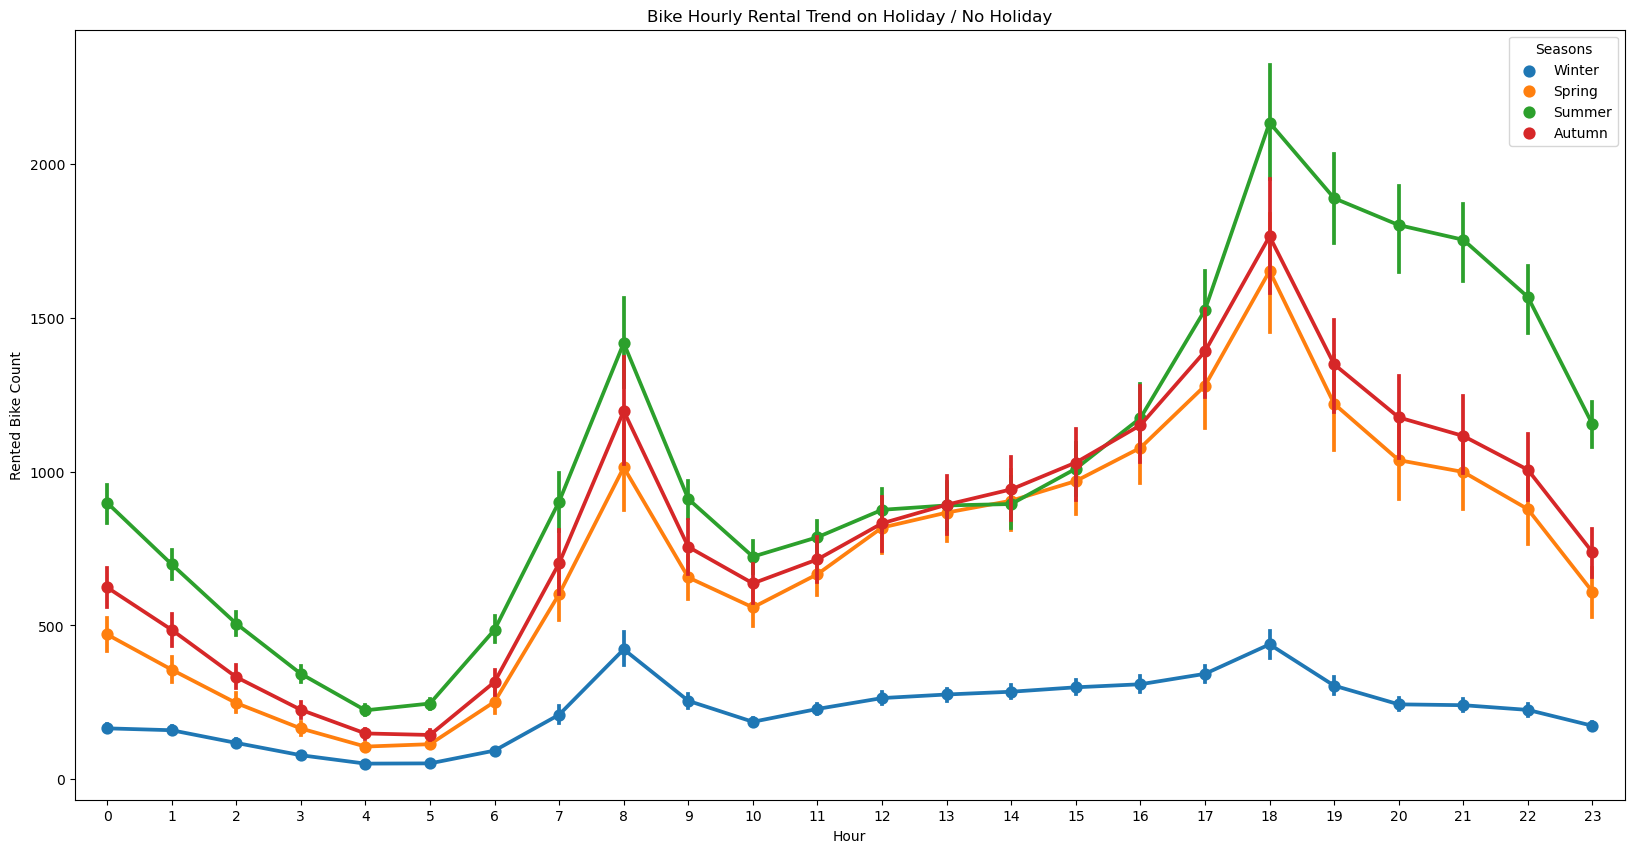

In [28]:
# Bike Rental trend with respect to Hour on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x = bike_df['Hour'],y = bike_df['Rented Bike Count'],hue = bike_df['Seasons'])
plt.title("Bike Hourly Rental Trend on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Hourly Rental Trend on Holiday / No Holiday')

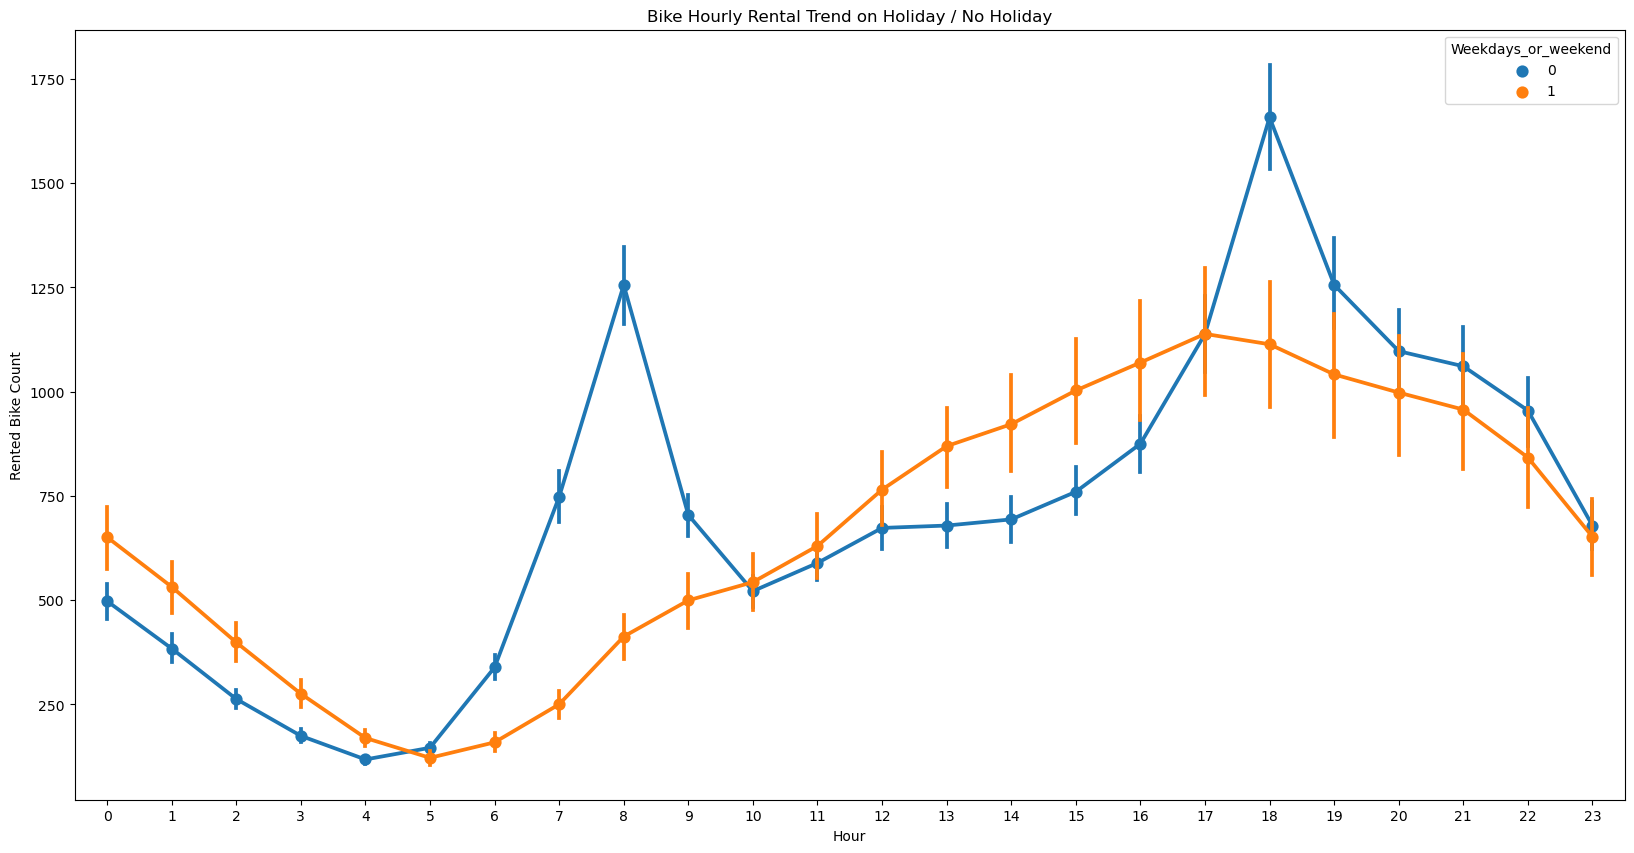

In [29]:
# Bike Rental trend with respect to Hour on Weekdays or weekend.
plt.figure(figsize=(20,10))
sns.pointplot(x = bike_df['Hour'],y = bike_df['Rented Bike Count'],hue = bike_df['Weekdays_or_weekend'])
plt.title("Bike Hourly Rental Trend on Holiday / No Holiday")

## Normalize the Target Variable

<Axes: xlabel='Rented Bike Count'>

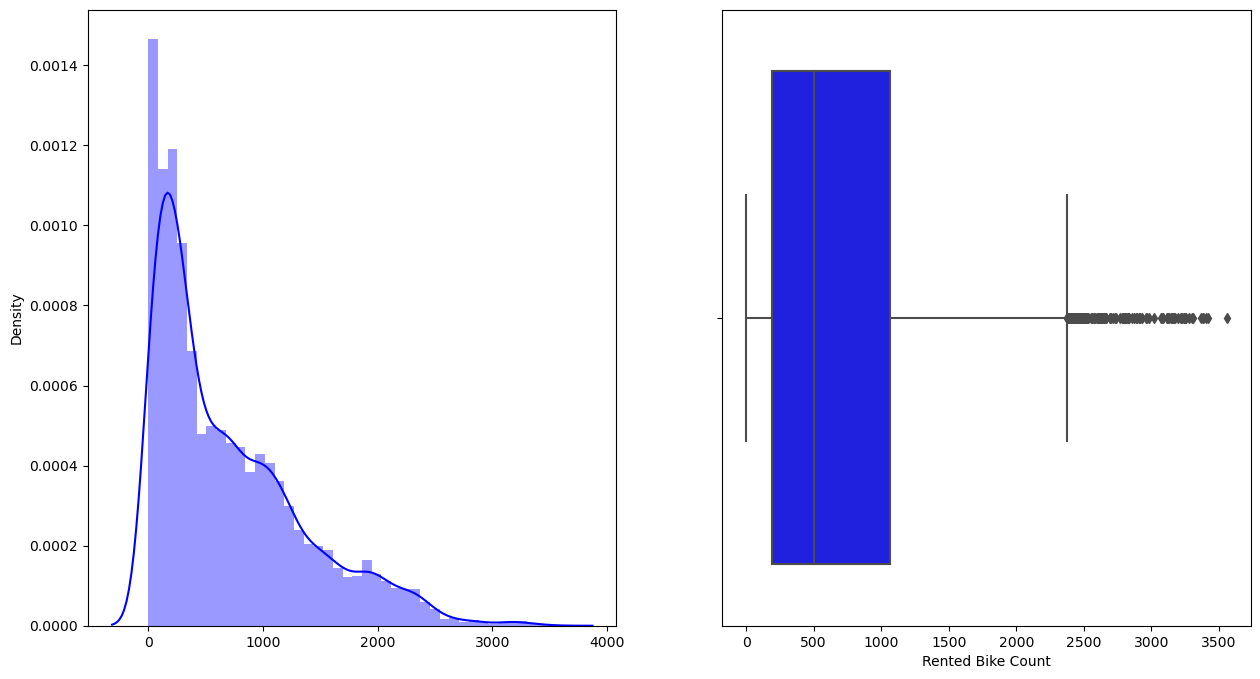

In [30]:
# Understanding the ditribution of Rented Bike Count variable
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= bike_df['Rented Bike Count'],color='b',ax=axes[0])
sns.boxplot(x = bike_df['Rented Bike Count'],color='b',ax=axes[1])

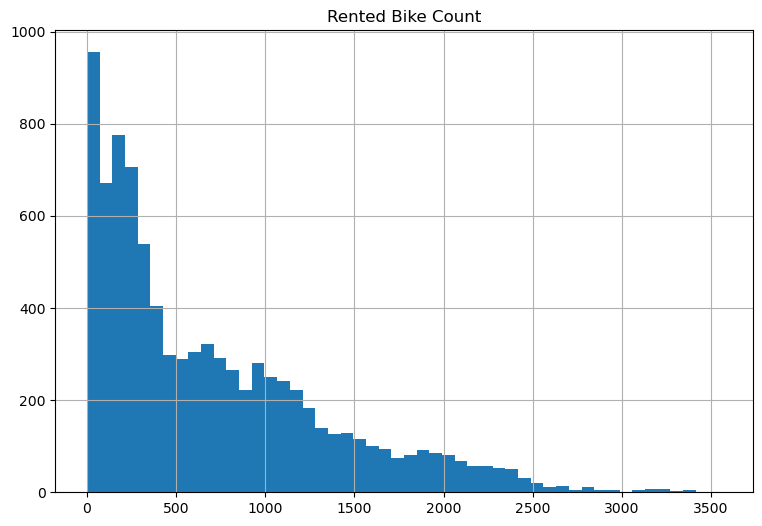

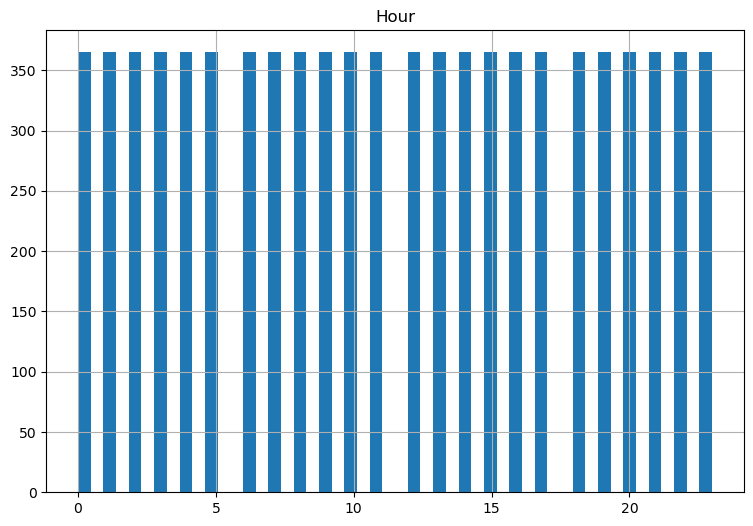

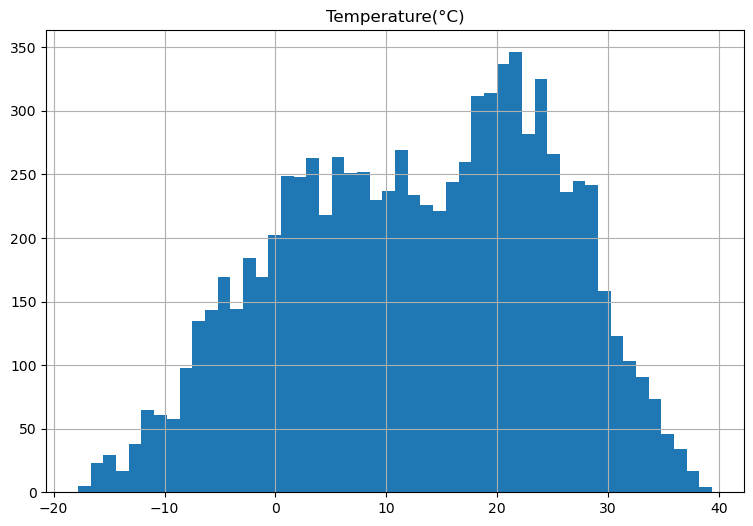

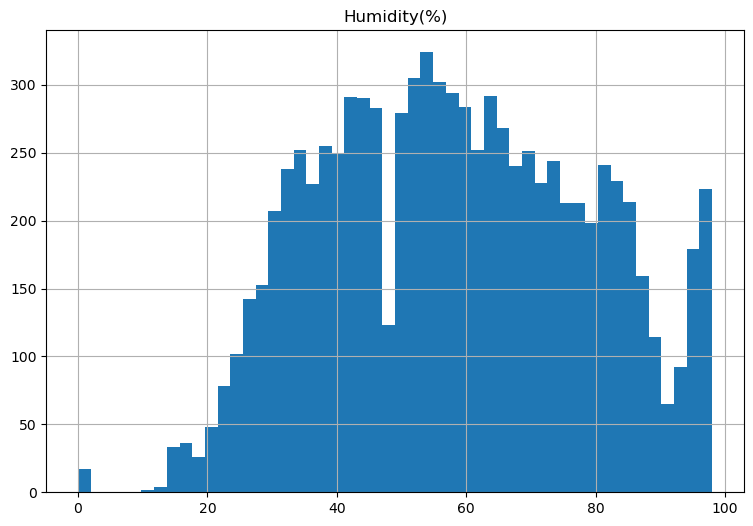

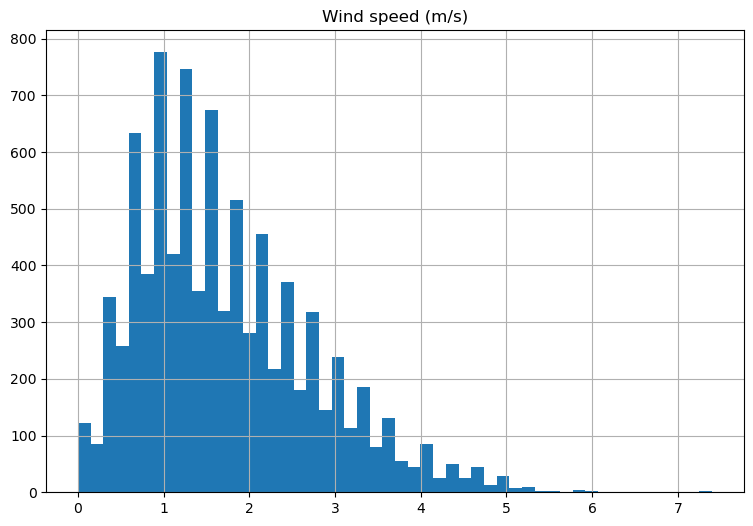

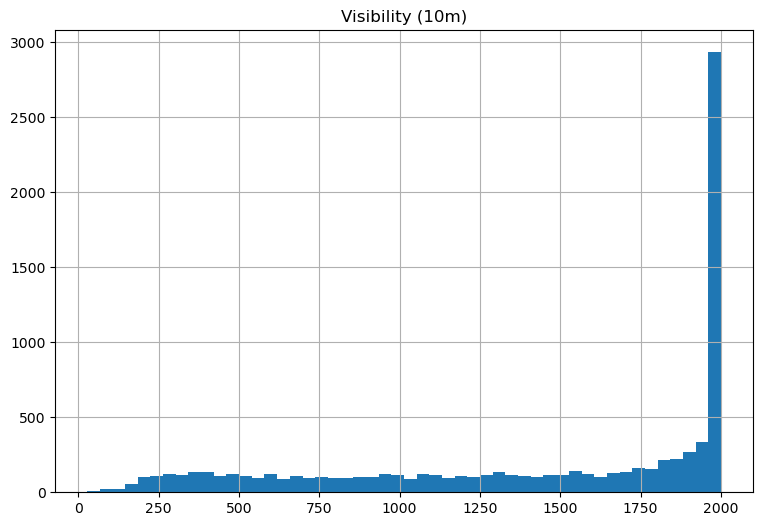

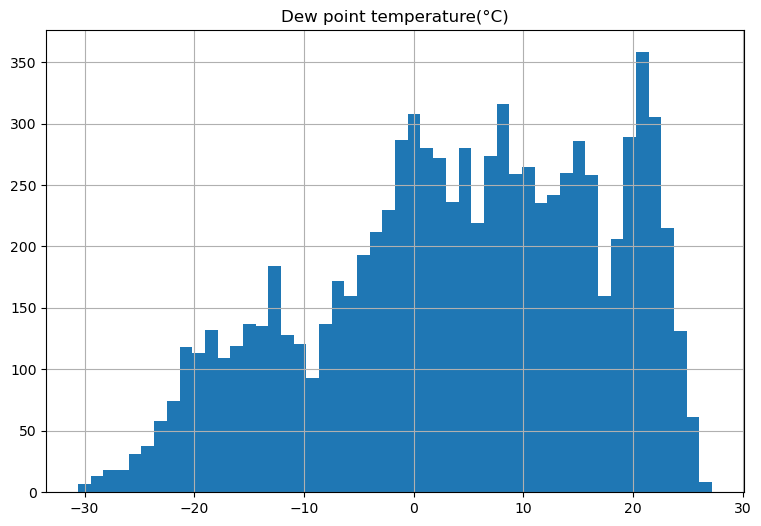

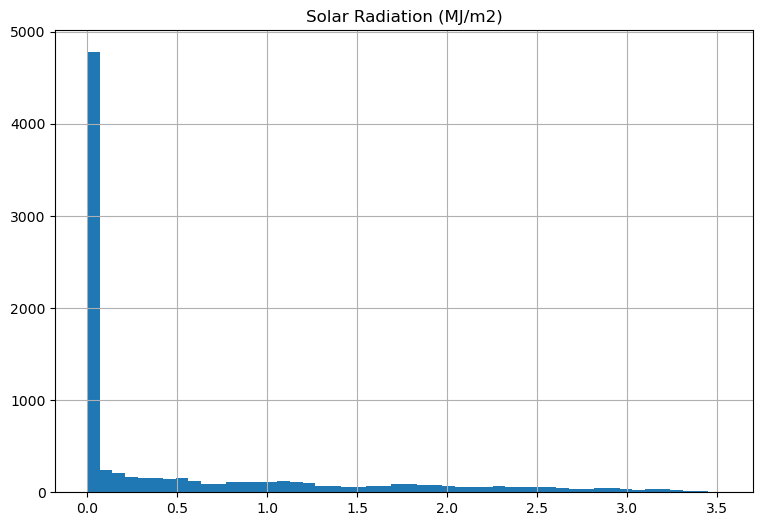

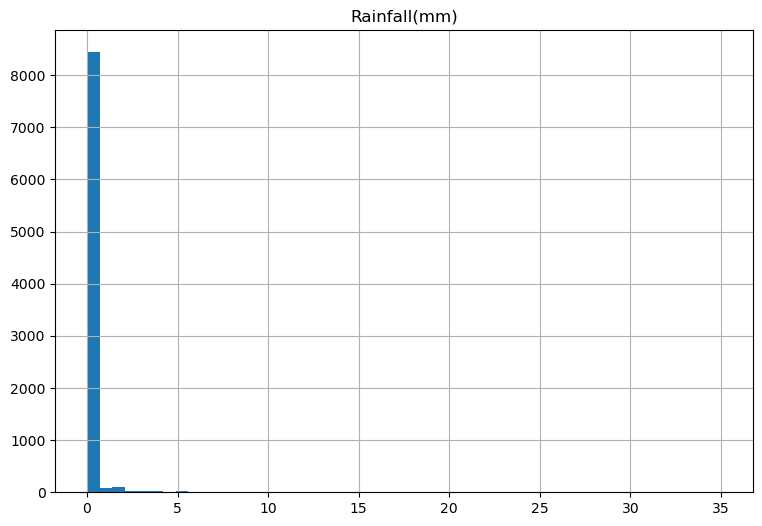

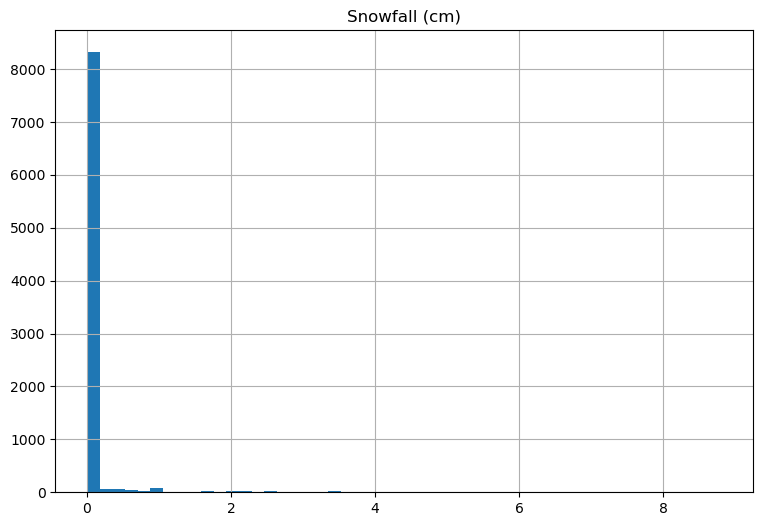

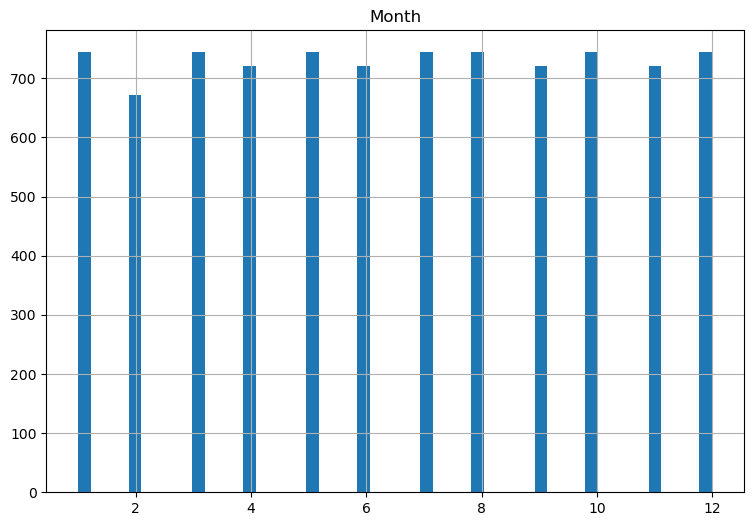

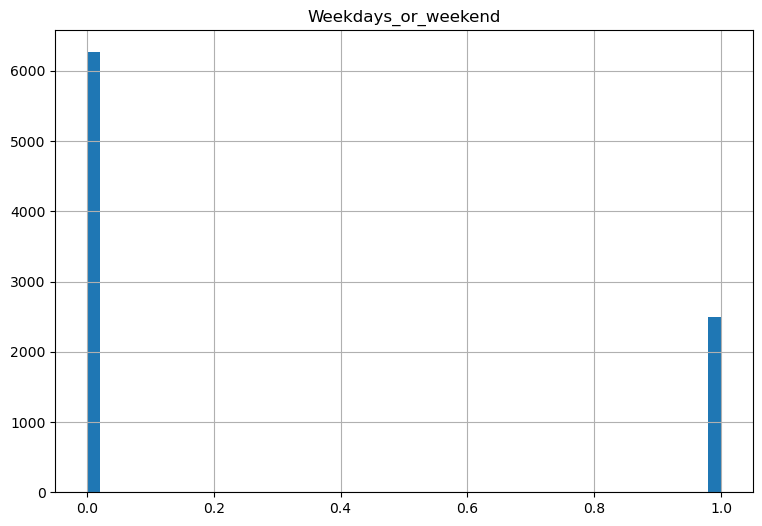

In [31]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins = 50, ax = ax)

    plt.title(col)
plt.show()

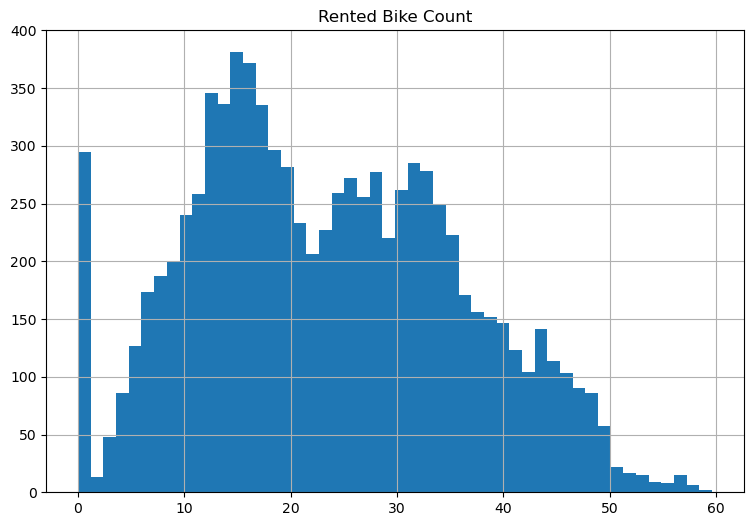

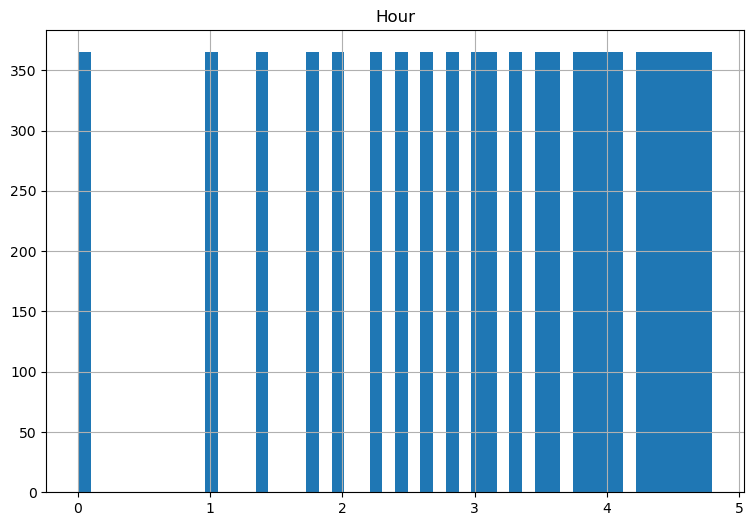

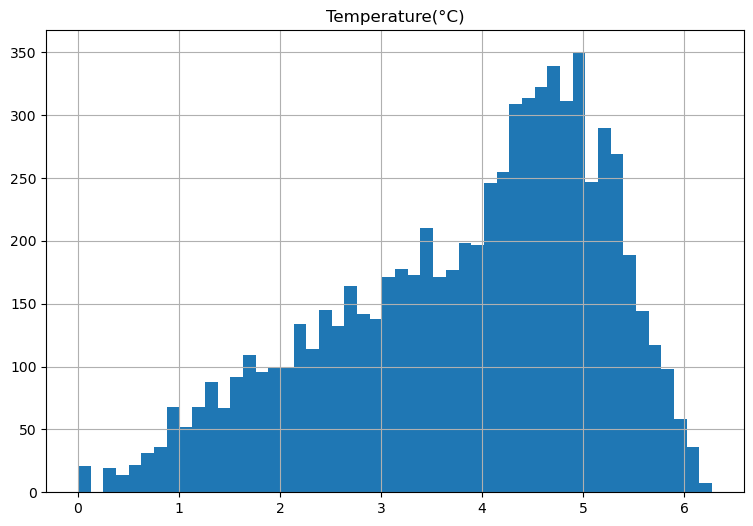

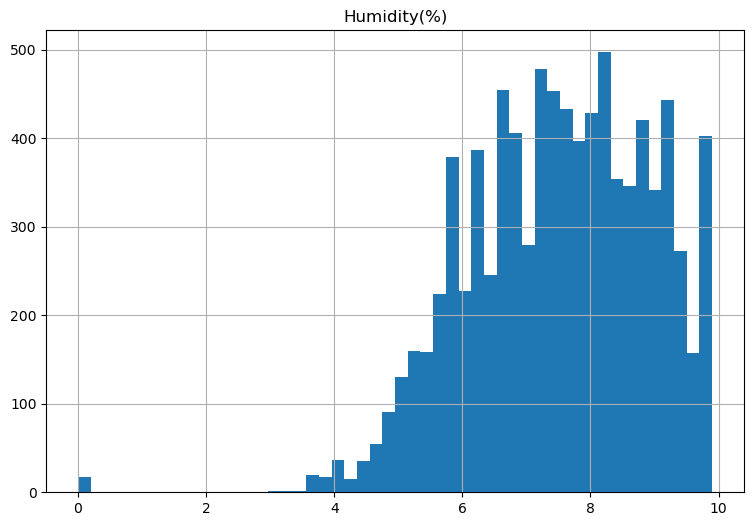

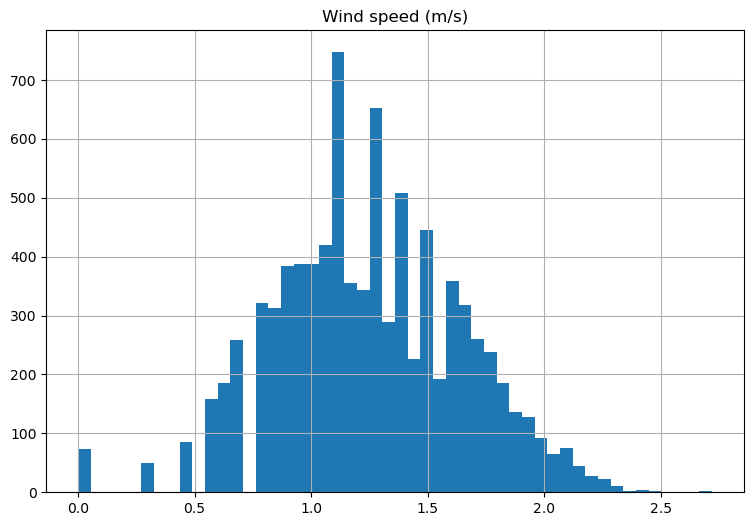

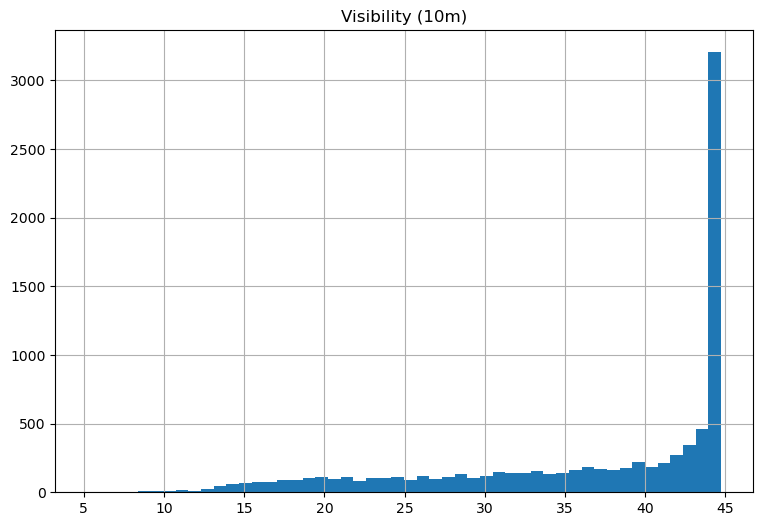

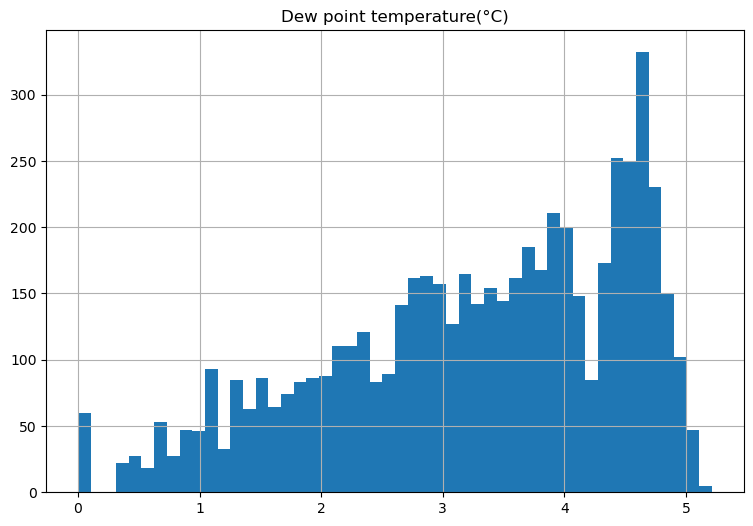

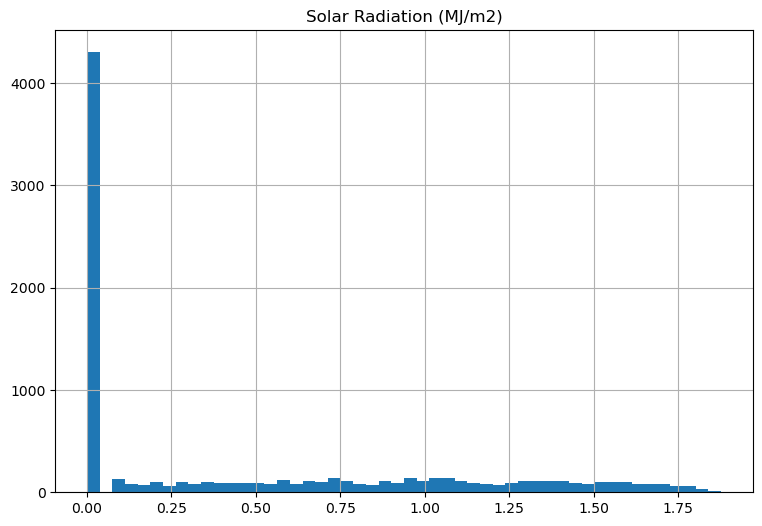

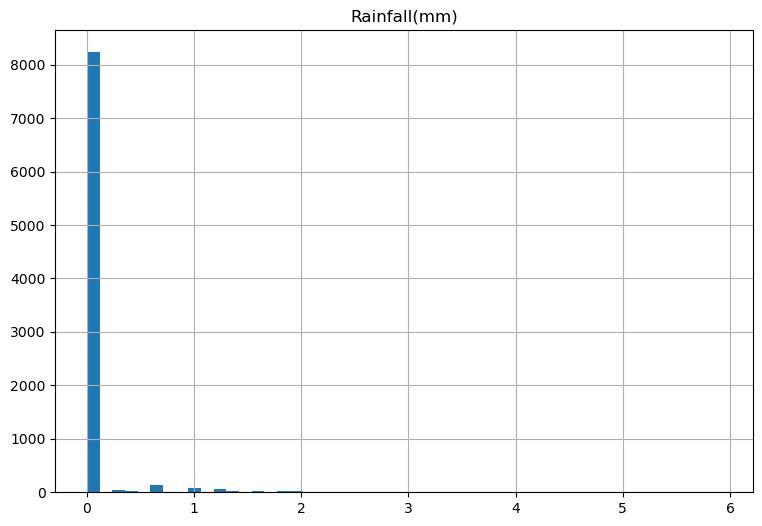

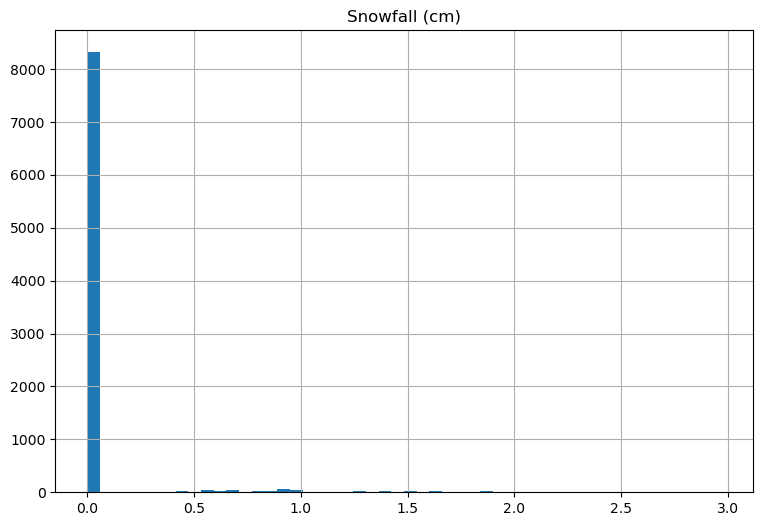

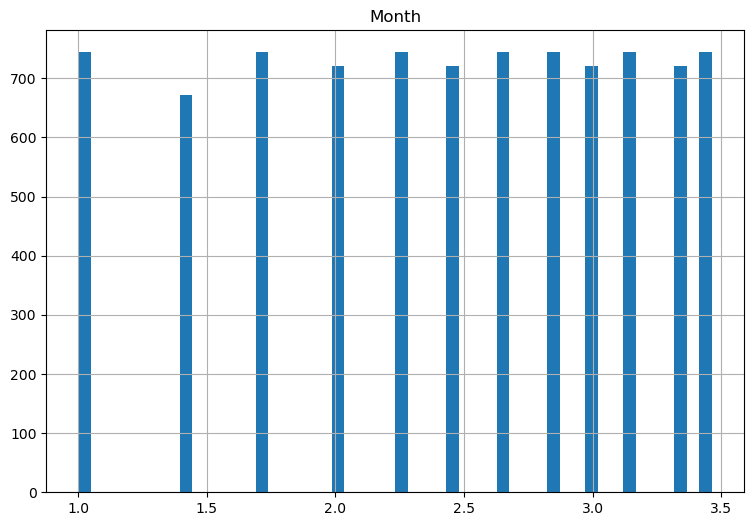

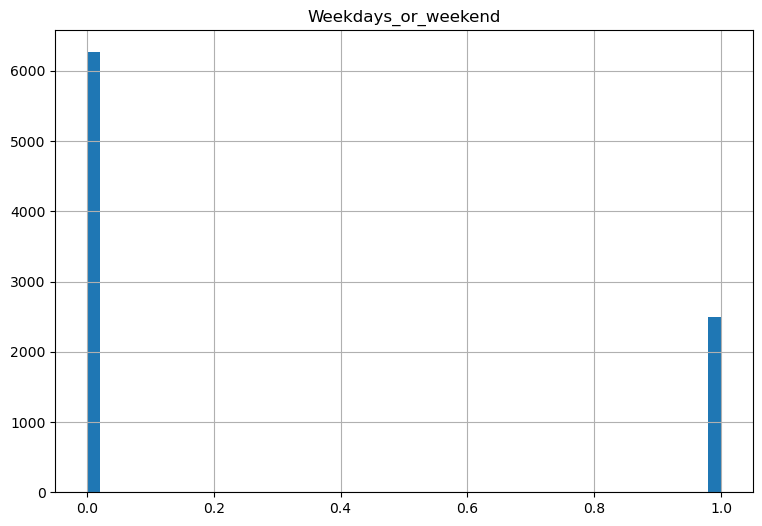

In [32]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    
    ax.set_title(col)
plt.show()

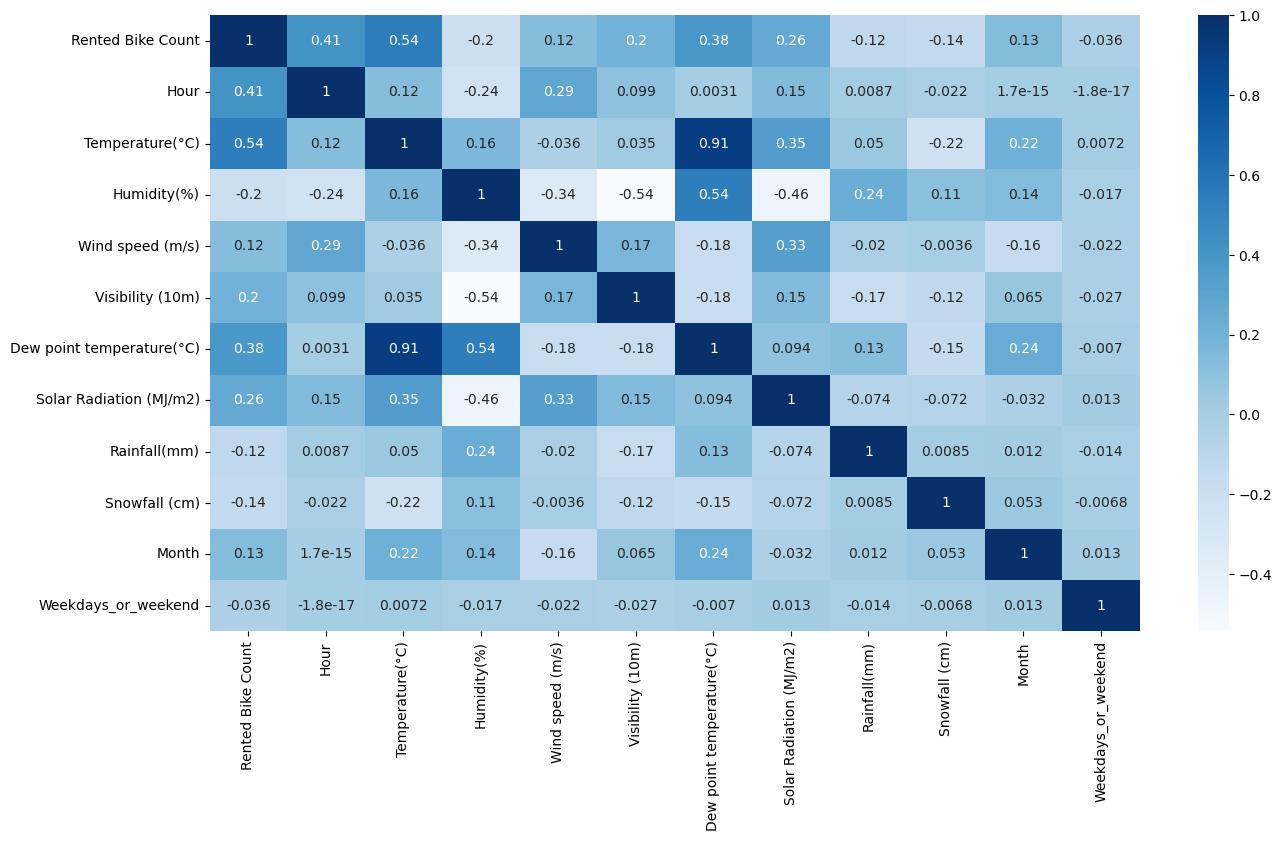

In [33]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = bike_df[numeric_features].corr()
sns.heatmap((correlation), annot=True, cmap='Blues')
plt.show()

In [34]:
# Make copy of dataset
df_new = bike_df.copy()

### Data Modeling

In [35]:
df_new.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [36]:
# Since Temperature and Dew point temperature are highly corelated. We will drop dew point temperature.
df_new.drop('Dew point temperature(°C)',inplace=True,axis=1)

In [37]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculating_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
Calculating_vif(df_new[[i for i in df_new.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.960112
1,Temperature(°C),3.288623
2,Humidity(%),6.155420
3,Wind speed (m/s),4.651787
4,Visibility (10m),5.359009
5,Solar Radiation (MJ/m2),2.260940
6,Rainfall(mm),1.080309
7,Snowfall (cm),1.131108
8,Month,5.009301
9,Weekdays_or_weekend,1.380635


In [39]:
Calculating_vif(df_new[[i for i in df_new.describe().columns if i not in ['Rented Bike Count','Humidity(%)']]])

,variables,VIF
0,Hour,3.929274
1,Temperature(°C),2.794584
2,Wind speed (m/s),4.281113
3,Visibility (10m),5.280633
4,Solar Radiation (MJ/m2),1.912107
5,Rainfall(mm),1.046907
6,Snowfall (cm),1.094804
7,Month,4.082794
8,Weekdays_or_weekend,1.353591


In [40]:
Calculating_vif(df_new[[i for i in df_new.describe().columns if i not in ['Rented Bike Count','Humidity(%)','Visibility (10m)']]])

,variables,VIF
0,Hour,3.746083
1,Temperature(°C),2.782149
2,Wind speed (m/s),3.650982
3,Solar Radiation (MJ/m2),1.909706
4,Rainfall(mm),1.030493
5,Snowfall (cm),1.088816
6,Month,3.300066
7,Weekdays_or_weekend,1.345299


In [41]:
# As per above vif calculation dropping humidity and visibility columns.
df_new.drop(['Humidity(%)','Visibility (10m)'],inplace=True,axis=1)

In [42]:
# Checking categoiries in season column.
df_new['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [43]:
# Create dummy variables for the catgeorical variable Season
df_new['Spring'] = np.where(df_new['Seasons'] == 'Spring', 1, 0)
df_new['Summer'] = np.where(df_new['Seasons'] == 'Summer', 1, 0)
df_new['Autumn'] = np.where(df_new['Seasons'] == 'Autumn', 1, 0)
df_new['Winter'] = np.where(df_new['Seasons'] == 'Winter', 1, 0)

In [44]:
# Drop the original column Seasons from the dataframe
df_new.drop(columns=['Seasons'],axis=1,inplace=True)

In [45]:
# Checking categoiries in holiday columns.
df_new['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [46]:
# Labeling for holiday=1 and no holiday=0
df_new['Holiday'] = df_new['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [47]:
# Checking categoiries in Functioning Day columns.
df_new['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [48]:
# # Labeling for Yes=1 and no No=0
df_new['Functioning Day'] = df_new['Functioning Day'].map({'Yes':1, 'No':0})

In [49]:
# Checking dummy and labeled columns
df_new.head()

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
0,254,0,-5.2,2.2,0.0,0.0,0.0,0,1,12,0,0,0,0,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,0,1,12,0,0,0,0,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,0,1,12,0,0,0,0,1
3,107,3,-6.2,0.9,0.0,0.0,0.0,0,1,12,0,0,0,0,1
4,78,4,-6.0,2.3,0.0,0.0,0.0,0,1,12,0,0,0,0,1


In [50]:
# Final info before going for modeling
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Solar Radiation (MJ/m2)  8760 non-null   float64
 5   Rainfall(mm)             8760 non-null   float64
 6   Snowfall (cm)            8760 non-null   float64
 7   Holiday                  8760 non-null   int64  
 8   Functioning Day          8760 non-null   int64  
 9   Month                    8760 non-null   int64  
 10  Weekdays_or_weekend      8760 non-null   int64  
 11  Spring                   8760 non-null   int32  
 12  Summer                   8760 non-null   int32  
 13  Autumn                   8760 non-null   int32  
 14  Winter                  

### Data Analysis using Linear Regression

In [51]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
# Creating a target variable for rented bike count
target_variable = 'Rented Bike Count'

In [53]:
# Create a list of feature variables
feature_variables = list(set(df_new.columns.tolist()) - {target_variable})
feature_variables

['Month',
 'Autumn',
 'Rainfall(mm)',
 'Summer',
 'Snowfall (cm)',
 'Temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Winter',
 'Wind speed (m/s)',
 'Functioning Day',
 'Hour',
 'Holiday',
 'Weekdays_or_weekend',
 'Spring']

In [54]:
# Create the target variable data
y = np.sqrt(df_new['Rented Bike Count'])

# Create the data of feature variables
X = df_new.drop('Rented Bike Count',axis=1)

In [55]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [56]:
X_train[0:10]

,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
180,12,-2.0,1.4,1.14,0.0,0.0,0,1,12,0,0,0,0,1
8011,19,8.0,2.1,0.00,0.0,0.0,0,1,10,0,0,0,1,0
1648,16,-1.7,2.0,1.41,0.0,0.0,0,1,2,0,0,0,0,1
8471,23,7.0,0.2,0.00,0.0,0.0,0,1,11,1,0,0,1,0
8251,19,11.9,2.7,0.00,0.0,0.0,0,0,11,0,0,0,1,0
2423,23,4.2,1.7,0.00,0.0,0.0,0,1,3,1,1,0,0,0
5407,7,24.9,0.3,0.24,0.0,0.0,0,1,7,1,0,1,0,0
786,18,-0.8,2.3,0.01,0.0,0.0,0,1,1,0,0,0,0,1
370,10,-6.2,2.3,0.52,0.0,0.0,0,1,12,1,0,0,0,1
6563,11,26.7,2.7,2.65,0.0,0.0,0,1,8,0,0,1,0,0


In [57]:
# Transforming data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 14)
(7008,)
(1752, 14)
(1752,)


In [59]:
X_train[0:10]

array([[0.52173913, 0.27670753, 0.18918919, 0.32386364, 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.82608696, 0.45183888, 0.28378378, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.81818182, 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.69565217, 0.28196147, 0.27027027, 0.40056818, 0.        ,
        0.        , 0.        , 1.        , 0.09090909, 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.43432574, 0.02702703, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.90909091, 1.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.82608696, 0.52014011, 0.36486486, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.90909091, 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.38528897, 0.2

In [60]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
# Cheeck coefficents
regressor.coef_

array([ 1.32511741e+01,  2.33194882e+01,  3.39060994e+00,  3.50724468e+00,
       -6.64932376e+01, -9.86255720e+00, -2.74887372e+00,  2.87116630e+01,
        1.11870775e+00, -1.42703806e+00,  2.27595783e-01, -5.66131224e-02,
        3.36749458e+00, -3.53847724e+00])

In [62]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,13.251174
Temperature(°C),23.319488
Wind speed (m/s),3.390610
Solar Radiation (MJ/m2),3.507245
Rainfall(mm),-66.493238
Snowfall (cm),-9.862557
Holiday,-2.748874
Functioning Day,28.711663
Month,1.118708
Weekdays_or_weekend,-1.427038


In [63]:
# Check intercept
regressor.intercept_

-24.42848380409441

In [64]:
# Checking score
regressor.score(X_train,y_train)

0.6185034451639333

In [65]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [66]:
# Evaluation of test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"MAE: {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"MSE: {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"RMSE: {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"R2: {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2: {adj_r2}.")

MAE: 5.8023050086131285.
MSE: 61.4363438649179.
RMSE: 7.838133952983829.
R2: 0.6091756877263201.
Adjusted R2: 0.6060256932693072.


In [67]:
# Residuals of the regression are normally distributed
def Residual_distPlot(y_pred_test,y_test):                                             
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution plot")

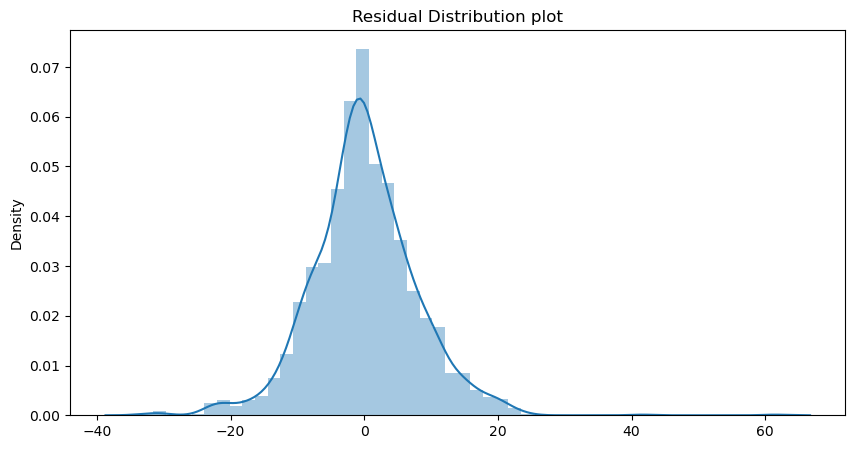

In [68]:
Residual_distPlot(y_pred,y_test)

### Data Analysis using Decision Tree Regression

In [69]:
# create an object
Decision_tree = DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
Decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [70]:
# check score on Test dataset.
Decision_tree.score(X_test,y_test)

0.840358170774893

In [71]:
#  predicting y_train_predictions from  X train values
y_pred_train = Decision_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred = Decision_tree.predict(X_test)

In [72]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"MAE: {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"MSE: {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"RMSE: {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"R2 Score: {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2: {adj_r2}.")

MAE: 3.2670536640513412.
MSE: 25.095189852544607.
RMSE: 5.009509941356002.
R2 Score: 0.840358170774893.
Adjusted R2: 0.8390714778507989.


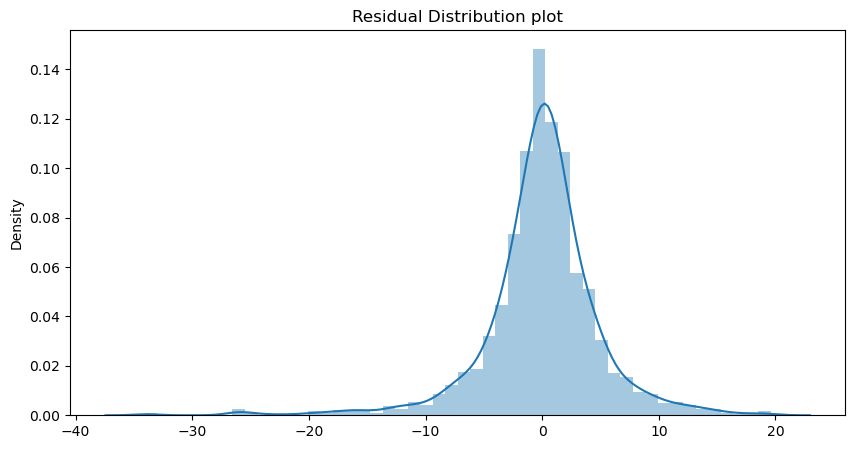

In [73]:
# Residuals of the regression are normally distributed
Residual_distPlot(y_pred,y_test)

### Random Forest Regressor

In [74]:
# create an object
rf = RandomForestRegressor()

# fitting Xtrain yTrain
rf.fit(X_train,y_train)

RandomForestRegressor()

In [75]:
rf.score(X_test,y_test)

0.9208301673043434

In [76]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [78]:
# Evaluation of Test data set

# Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"MAE: {MAE}.")

# Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"MSE: {MSE}.")

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"RMSE: {RMSE}.")

# Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"R2 Score: {R2}.")

# Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2: {adj_r2}.")

MAE: 2.1075084631931302.
MSE: 12.445246911385503.
RMSE: 3.5277821519171932.
R2 Score: 0.9208301673043434.
Adjusted R2: 0.9201920684800837.


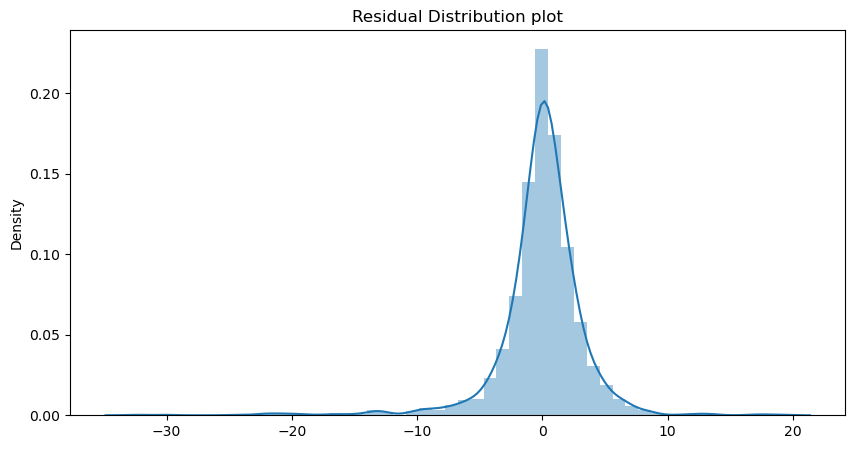

In [79]:
# Residuals of the regression are normally distributed
Residual_distPlot(y_pred,y_test)